<a href="https://colab.research.google.com/github/james-yu2005/pytorch-practice/blob/main/pytorch_workflow_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pytorch workflow
1. prepare data,
2. build model,
3. fit model to data (train),
4. make predictions and evaluate those predictions,
5. save and load model,
6. put all together

In [2]:
import torch
from torch import nn
import matplotlib.pyplot as plt
## nn contains all of pytorch building blocks for neural networks

torch.__version__

'2.8.0+cu126'

In [3]:
# Data preparation and loading --> data is legit anything bro
# Make a straight line with known parameters

w = 0.7
b = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1) # add extra dimension at index 1
y = w * X + b
X[:20], y[:20], len(X), len(y), X.shape, y.shape

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [0.4680],
         [0.4820],
         [0.4960],
         [0.5100],
         [0.5240],
         [0.5380],
         [0.5520],
         [0.5660]]),
 50,
 50,
 torch.Size([50, 1]),
 torch.Size([50, 1]))

In [4]:
# Create a train/test split
train_split = int(0.8 * len(X))
X_train,y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_test), len(X_train)

(10, 40)

In [38]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c='b', s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c='r', s=4, label="Testing data")

  if predictions is not None:
    plt.scatter(test_data, predictions, c='g', s=4, label="Predictions")

  plt.legend(prop={"size": 14})
  plt.plot()

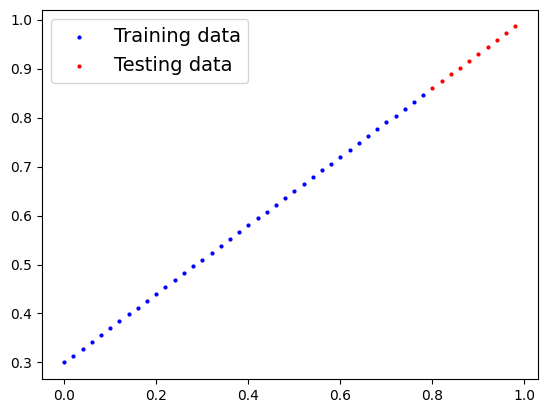

In [6]:
plot_predictions()

## Build Model

Use gradient descent and backpropagation, which pytorch takes care of for us

In [13]:
# Linear regression model class
class LinearRegressionModel(nn.Module): # almost everything in pytorch inherits from nn.module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float32))
    self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float32))

  # Forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias # linear regression formula


## Pytorch model building essentials

torch.nn - computational graphs (a neural network can be considered a computational graph)
torch.nn.Parameter - what parameters our model should try and learn (pytorch layer oftentimes)
torch.nn.Module - base class for all neural network modules
torch.optim - where optimizers life for backpropogation
def forward() - all nn.Module subclasses require you to override this

## Checking the contents of our PyTorch Model
.parameter() use this

In [31]:
# Create a random seed
torch.manual_seed(2)

# Create an instance of the model
model_0 = LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3923], requires_grad=True),
 Parameter containing:
 tensor([-0.2236], requires_grad=True)]

In [32]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3923])), ('bias', tensor([-0.2236]))])

In [33]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [34]:
# Making predictions using 'torch.inference_model()'
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.0903],
        [0.0981],
        [0.1060],
        [0.1138],
        [0.1217],
        [0.1295],
        [0.1373],
        [0.1452],
        [0.1530],
        [0.1609]])

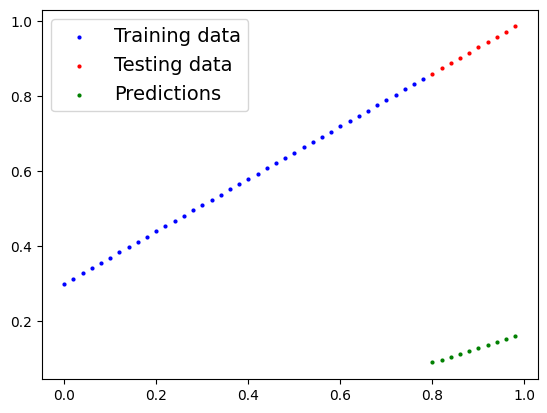

In [39]:
plot_predictions(predictions=y_preds)

5:36https://www.youtube.com/watch?v=V_xro1bcAuA
